## Question 1-a

In [ ]:
import numpy as np

In [51]:
data = [0] * 4 + [1] * 6 #heads = 1, tails = 0

In [52]:
np.mean(data)

0.6

In [15]:
def bern_pmf(x, p):
    if type(x) is int:
        if (x == 1):
            return p
        elif (x == 0):
            return 1 - p
        else:
            print("Value is Not in Support of Distribution")
            return None
    elif type(x) is list:
        result = []
        for i in x:
            if (i == 1):
                result.append(p)
            elif (i == 0):
                result.append(1 - p)
            else:
                print("A value in the list is not supported by distribution")
                return None
        return result

In [20]:
np.product(bern_pmf(data, 0.5))

0.0009765625

Currently, we have only tested our model with p = .5, but what if p = .8? or .2? What would the probablility of our data look like then? This can be done by defining a grid of values for our p. Below I will make a grid of 100 values between 0 and 1 (because p has to be between 0 and 1) and then I will calculate the probability of seeing our data given each of these values:

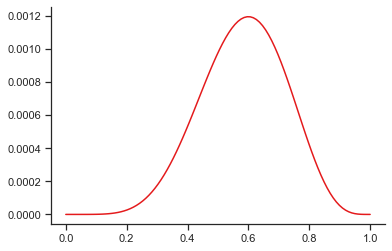

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', palette='Set1')

params = np.linspace(0, 1, 100)
p_x = [np.product(bern_pmf(data, p)) for p in params]
plt.plot(params, p_x)
sns.despine()

## Question 1-b

In [45]:
# N = 5, 3 heads 2 tails

data = [1] * 3 + [0] * 2

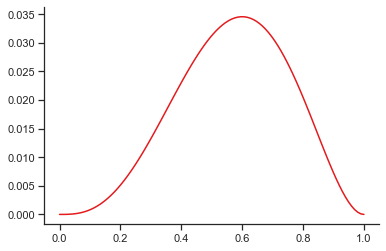

In [46]:
p_x = [np.product(bern_pmf(data, p)) for p in params]
plt.plot(params, p_x)
sns.despine()

In [121]:
# N = 100, 60 heads, 40 tails
data = [1] * 60 + [0] * 40 

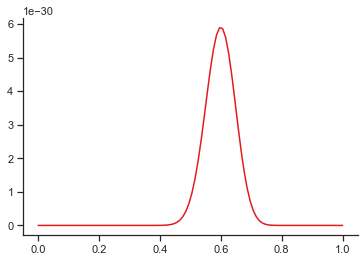

In [122]:
p_x = [np.product(bern_pmf(data, p)) for p in params]
plt.plot(params, p_x)
sns.despine()

In [123]:
# N = 10, 5 heads, 5 tails
data = [1] * 5 + [0] * 5 

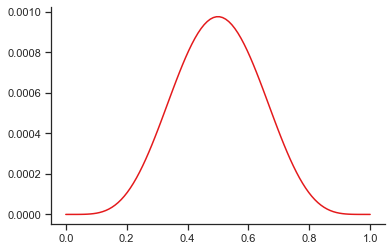

In [124]:
p_x = [np.product(bern_pmf(data, p)) for p in params]
plt.plot(params, p_x)
sns.despine()

In [125]:
from math import gamma

In [126]:
def posterior_beta(a, b, p):
    return ((p**(a - 1)) * ((1 - p)**(b - 1)) * gamma(a + b)) / ((gamma(a) * gamma(b)))

def posterior_pmf(a, b, data, p):
    z = sum(data)
    N = len(data)
    result = []
    for i in data:
        result.append(posterior_beta(a+z, N+b-z, p))
    return result
    

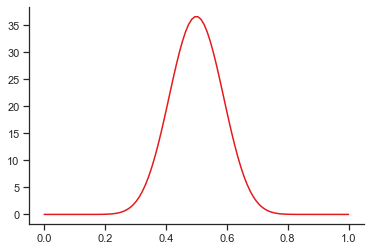

In [130]:
# N = 10, 6 heads, 4 tails
data = [1] * 2 + [0] * 2
params = np.linspace(0, 1, 100)
a = 3
b = 3
p_x = [np.product(posterior_pmf(a, b, data, p)) for p in params]
plt.plot(params, p_x)
sns.despine()